In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Function to calculate a range of usable records values which can then be used to plot a graph
def CalculateUsableGraph(cr,db):
    # Create a list of the threshold values being tested
    PlayerThresholds = list(range(0, 2100, 100))
    UsableRecords = []

    # Loop through each of the threshold values
    for PlayerThreshold in PlayerThresholds:

        # For the threshold value, get the number of players that are acceptable and append the result to a list
        SQLString = """SELECT COUNT() FROM PlayerStatistics WHERE statistics$all$battles >= """ + str(PlayerThreshold) + """ ORDER BY account_id"""
        cr.execute(SQLString)
        UsablePlayers = cr.fetchone()[0]
        UsableRecords.append(UsablePlayers)

    # Output the results of each trial
    print("Battle Threshold : Usable Records : Percentage of Dataset")
    for Position in range(len(UsableRecords)):
        print(CalculateSpacing(PlayerThresholds[Position],len(str(PlayerThresholds[-1]))) + " : " + CalculateSpacing(UsableRecords[Position],len(str(UsableRecords[-1]))) + " : " + str(round((UsableRecords[Position] / UsableRecords[0]) * 100, 2)) + "%")

    return PlayerThresholds
    return UsableRecords

In [2]:
# Defining the arrays of values
BattleThresholds = list(range(0, 2100, 100))
UsableRecords_PulledData = [9297107, 4387685, 3660240, 3281917, 3034211, 2852257, 2708144, 2590434, 2491318, 2405133, 2328776, 2260674, 2198796, 2142569, 2090752, 2042402, 1997597, 1955811, 1916644, 1879312, 1844109]
UsableRecords_First_Deletion = [4305369, 4305369, 3577925, 3199603, 2951897, 2769944, 2625831, 2508123, 2409009, 2322827, 2246473, 2178373, 2116496, 2060273, 2008459, 1960117, 1915317, 1873538, 1834377, 1797051, 1761855]
UsableRecords = [1446860, 1446860, 1252567, 1146856, 1075585, 1022539, 980098, 945160, 915257, 889109, 865490, 844428, 824969, 807085, 790351, 774780, 760138, 746622, 733647, 721091, 709249]

# Converting the large numbers into smaller integers which represent a number of millions
for Position in range(len(UsableRecords)):
    UsableRecords[Position] = round(UsableRecords[Position] / 1000000, 3)

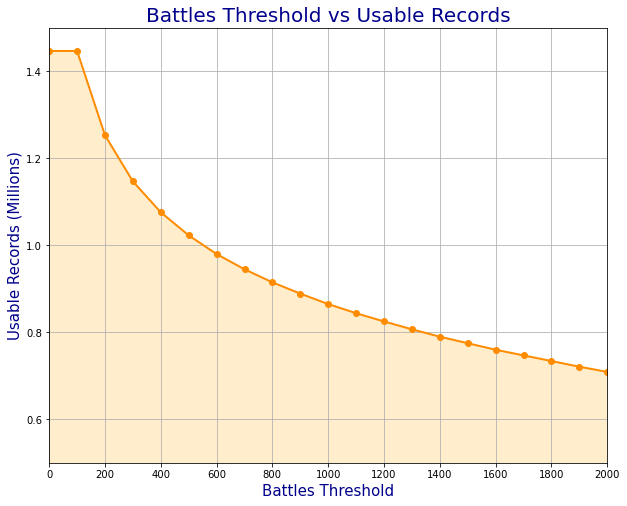

In [3]:
# Plot the results of the threshold analysis onto a graph
plt.figure(figsize = (10,8))
plt.plot(BattleThresholds, UsableRecords, color = "darkorange", linewidth = 2, marker = ".", markersize = 12)
plt.grid()
plt.xlim(0, 2000)
plt.ylim(0.5, 1.5)
plt.xticks(np.arange(0, 2100, 200))

plt.title("Battles Threshold vs Usable Records", color = "darkblue", size = 20)
plt.xlabel("Battles Threshold", color = "darkblue", size = 15)
plt.ylabel("Usable Records (Millions)", color = "darkblue", size = 15)
plt.fill_between(BattleThresholds, UsableRecords, facecolor = "orange", alpha = 0.2)

# Save the graph as a png image file
plt.savefig("Visualisations/Threshold Results.png", dpi=100)